# Model Analysis

Scale up the vanilla model to larger dataset

Scrapped through 18530 comments from 172 different articles. Mixed with all topics.
More data is being scrapped through - it just takes time. Went through 3000 articles to get 172 different articles with comments.
(Note: Not many articles have comments.)

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from scipy import stats
from statsmodels.formula.api import ols

In [2]:
# Read in the data
# More data is being collected; they will be added afterwards
df1 = pd.read_csv('data1.csv')
df2 = pd.read_csv('data2.csv')
df_ttl = pd.concat([df1, df2], ignore_index=True)

(18530, 16)


In [3]:
print(df_ttl.shape)
print(df_ttl.columns)

(18530, 16)
Index(['userName', 'cleanName', 'comment', 'n_recommend', 'n_reply',
       'nyt_select', 'ttlCommentNum', 'time', 'time_order', 'time_order_cap',
       'url', 'n_rec_log', 'ttl_comment_log', 'gender', 'date', 'category'],
      dtype='object')


In [7]:
# Gender sizes? 
df_ttl.groupby(['gender']).size()

gender
0    7684
1    3606
2    7240
dtype: int64

In [13]:
# Run the model on a larger data
model1 = ols('n_rec_log ~ C(gender) + C(nyt_select) + ttl_comment_log + time_order_cap', data = df_ttl).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              n_rec_log   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     1096.
Date:                Tue, 21 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:49:04   Log-Likelihood:                -31652.
No. Observations:               18530   AIC:                         6.332e+04
Df Residuals:                   18524   BIC:                         6.336e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.06

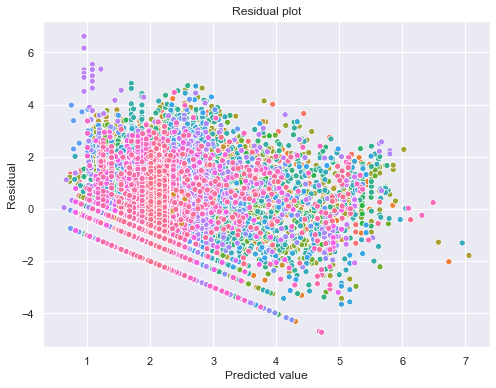

In [16]:
## :::::: MODEL 1 ::::::
# Residual plot
# 1) Prep data
df_ttl['yhat_model1'] = model1.fittedvalues
df_ttl['residual_model1'] = df_ttl['n_rec_log'] - model1.fittedvalues

# 2) Plot residual plot
# Coloring by article (url)
sns.set()
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.scatterplot(x='yhat_model1', y='residual_model1', data=df_ttl, hue='url')
_ = plt.xlabel('Predicted value')
_ = plt.ylabel('Residual')
_ = ax.get_legend().set_visible(False)
_ = plt.title('Residual plot: Model 1')

1. Residual plot

The lines created by logging of dependent variable. 
Scattered through pretty around everywhere.

In [ ]:
# Model Performance explanation: categories?
categories = set(df_ttl['category'].values.tolist())
print(len(categories))
print(categories)

2. Difference in performance: Category?

The performance worse when larger data used. 
But this could be because _all_ topics are included. 
Currently there are '41' different topics.
I will add an interaction term for business/tech(male dominance) and others.
This is because the hypothesis of this research 

In [10]:
# Get categories and filter them
categories = set(df_ttl['category'].values.tolist())
print(len(categories))
print(categories)

41
{nan, "'/business/economy/'", "'/health/'", "'/sports/baseball/'", "'/movies/'", "'/books/review/'", "'/business/'", "'/t-magazine/'", "'/fashion/runway-womens/'", "'/world/middleeast/'", "'/sports/soccer/'", "'/podcasts/the-daily/'", "'/opinion/'", "'/us/politics/'", "'/us/'", "'/upshot/'", "'/travel/'", "'/theater/'", "'/sports/football/'", "'/sports/tennis/'", "'/business/media/'", "'/smarter-living/'", "'/science/'", "'/well/mind/'", "'/world/europe/'", "'/learning/'", "'/reader-center/'", "'/books/'", "'/opinion/sunday/'", "'/technology/'", "'/world/asia/'", "'/podcasts/'", "'/magazine/'", "'/nyregion/'", "'/well/live/'", "'/business/dealbook/'", "'/world/africa/'", "'/dining/'", "'/world/canada/'", "'/style/'", "'/climate/'"}


In [18]:
# Add a new column in the data that has business/science/tech
df_ttl['biz_tech'] = [bool(re.search("business|science|technology", str(i))) for i in df_ttl['category']]
df_ttl.head()

,userName,cleanName,comment,n_recommend,n_reply,nyt_select,ttlCommentNum,time,time_order,time_order_cap,url,n_rec_log,ttl_comment_log,gender,date,category,yhat_model1,residual_model1,biz_tech
0,Adam,adam,Steven Skybell was absolutely brilliant in Fid...,12,0,False,15,2020-01-07 13:29:33,1,1,https://www.nytimes.com/2020/01/06/theater/ste...,2.564949,2.772589,0,'2020/01/06','/theater/',2.399473,0.165477,False
1,Philip,philip,My wife and I thought this was the greatest Fi...,11,0,False,15,2020-01-07 13:37:29,2,2,https://www.nytimes.com/2020/01/06/theater/ste...,2.484907,2.772589,0,'2020/01/06','/theater/',2.310152,0.174755,False
2,Matt,matt,Saw the production twice as a late 20-somethin...,15,0,False,15,2020-01-07 14:22:28,3,3,https://www.nytimes.com/2020/01/06/theater/ste...,2.772589,2.772589,0,'2020/01/06','/theater/',2.220832,0.551757,False
3,Abbott Katz,abbott,If Fiddler cares so deeply about tradition why...,2,1,False,15,2020-01-07 14:30:54,4,4,https://www.nytimes.com/2020/01/06/theater/ste...,1.098612,2.772589,0,'2020/01/06','/theater/',2.131511,-1.032899,False
4,Anne,anne,I was in that production back when he was 17 a...,16,0,False,15,2020-01-07 16:20:00,5,5,https://www.nytimes.com/2020/01/06/theater/ste...,2.833213,2.772589,1,'2020/01/06','/theater/',2.006839,0.826374,False


In [36]:
# This is without interaction terms
model2 = ols('n_rec_log ~ C(gender) + C(biz_tech) + C(nyt_select) + ttl_comment_log + time_order_cap', data = df_ttl).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              n_rec_log   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     919.1
Date:                Tue, 21 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:37:38   Log-Likelihood:                -31638.
No. Observations:               18530   AIC:                         6.329e+04
Df Residuals:                   18523   BIC:                         6.335e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.00

In [37]:
# This is with interaction terms
model3 = ols('n_rec_log ~ C(gender)*C(biz_tech) + C(nyt_select) + ttl_comment_log + time_order_cap', data = df_ttl).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              n_rec_log   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     690.0
Date:                Tue, 21 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:37:41   Log-Likelihood:                -31636.
No. Observations:               18530   AIC:                         6.329e+04
Df Residuals:                   18521   BIC:                         6.336e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Frankly, model 2 and model 3 are not that different.

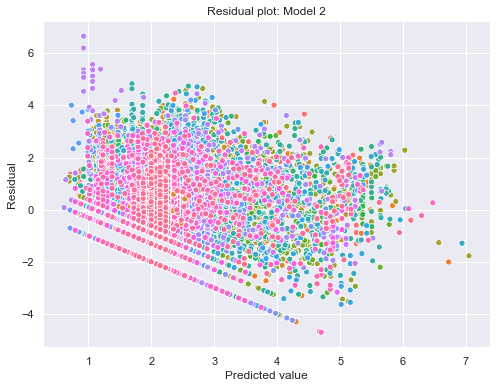

In [21]:
## :::::: MODEL 2 ::::::
# Residual plot
# 1) Prep data
df_ttl['yhat_model2'] = model2.fittedvalues
df_ttl['residual_model2'] = df_ttl['n_rec_log'] - model2.fittedvalues

# 2) Plot residual plot
# Coloring by article (url)
sns.set()
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.scatterplot(x='yhat_model2', y='residual_model2', data=df_ttl, hue='url')
_ = plt.xlabel('Predicted value')
_ = plt.ylabel('Residual')
_ = ax.get_legend().set_visible(False)
_ = plt.title('Residual plot: Model 2')

Comment: displays similar distribution.
Check `n_rec_log` distribution.

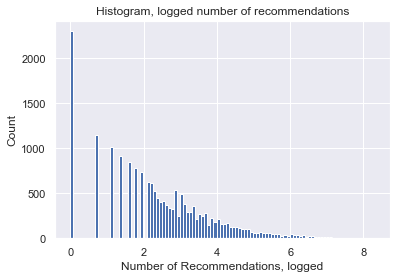

In [28]:
# Wait, is n_rec_log a good histogram...?
_=plt.hist(x='n_rec_log', bins=100, data=df_ttl)
_=plt.xlabel('Number of Recommendations, logged')
_=plt.ylabel('Count')
_=plt.title('Histogram, logged number of recommendations')

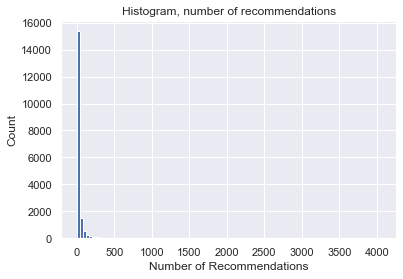

In [29]:
_=plt.hist(x='n_recommend', bins=100, data=df_ttl)
_=plt.xlabel('Number of Recommendations')
_=plt.ylabel('Count')
_=plt.title('Histogram, number of recommendations')

What if I log it again?

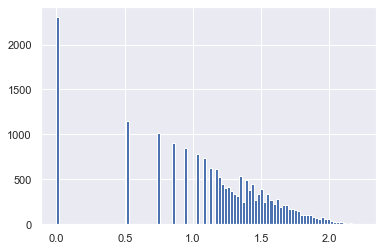

In [35]:
double_log = np.log(np.asarray(df_ttl['n_rec_log'])+1)
_=plt.hist(x=double_log, bins=100)

Maybe that wouldn't be much of a help either.
There are many comments without recommendations. 
The predictive/analysis model is not that strong in explaining the variability.

The takeaway from a larger sample is that most of the p-values are statistically significant.
However variability is larger as well. Too many zero(0) recommendations.